In [1]:
from deepface import DeepFace 
import cv2 ,os
import matplotlib.pyplot as plt
import numpy as np

In [8]:
detector  = cv2.CascadeClassifier(cv2.data.haarcascades + "./haarcascade_frontalface_default.xml")

## for a single image 

In [24]:
image =  cv2.imread(os.path.join("C:/Users/RISHABH/Pictures/images/ladies_1.jpg"))

In [33]:
objs =  DeepFace.analyze(image,actions=["age","race","gender","emotion"], detector_backend = 'opencv',align=True)

Action: emotion: 100%|█████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  5.72it/s]


In [34]:
objs[0]

{'age': 27,
 'region': {'x': 28,
  'y': 15,
  'w': 42,
  'h': 42,
  'left_eye': None,
  'right_eye': None},
 'face_confidence': 0.92,
 'race': {'asian': 77.66095666158716,
  'indian': 6.483762683419862,
  'black': 0.7461447310573184,
  'white': 1.2096851553398185,
  'middle eastern': 0.453973879936471,
  'latino hispanic': 13.44547260457604},
 'dominant_race': 'asian',
 'gender': {'Woman': 99.35027956962585, 'Man': 0.6497232709079981},
 'dominant_gender': 'Woman',
 'emotion': {'angry': 1.7802553751683875e-06,
  'disgust': 2.442697419577213e-08,
  'fear': 0.0005027616535717466,
  'happy': 99.96945858365791,
  'sad': 3.959211508511752e-06,
  'surprise': 0.003124188142925424,
  'neutral': 0.02690070220894191},
 'dominant_emotion': 'happy'}

In [3]:
def get_items(image,actions=["age","race","gender","emotion"], detector_backend = 'opencv',align=True):
    objs  = DeepFace.analyze(image,actions=actions, detector_backend = detector_backend,align=align,enforce_detection=False)
    (x,y,w,h,_,_) = objs[0]['region'].values()
    region = (x,y,w,h)
    age  = objs[0]['age']
    gender=  objs[0]['dominant_gender']
    race = objs[0]['dominant_race']
    gender_probs =  objs[0]['gender']
    race_probs =  objs[0]['race']
    return (region, age,gender,race,gender_probs,race_probs )
    
    
    

In [39]:
(region,age,gender,race,gender_probs,race_probs ) =  get_items(image)

Action: emotion: 100%|█████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  6.10it/s]


AGE : 27 RACE : asian GENDER :Woman


(-0.5, 111.5, 180.5, -0.5)

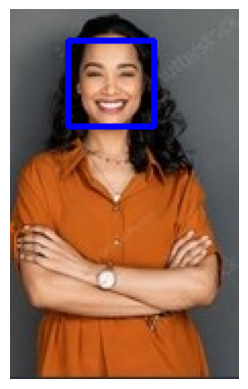

In [41]:
(x,y,w,h)  =  region
cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
print(f"AGE : {age} RACE : {race} GENDER :{gender}")
image =  np.array(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

plt.imshow(image)
plt.axis("off")

In [ ]:
    (region, age,gender,race,gender_probs,race_probs ) =  get_items(image)
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    cv2.imshow("Metrics Detection",frame)

### for video capture 

In [12]:
cap =  cv2.VideoCapture(0)

while cap.isOpened():
    ret,frame = cap.read()
    frame = cv2.resize(frame,(600,500))
    frame = cv2.flip(frame,1)
    if not ret:
        print("Not able to Open WEB CAM")

    if cv2.waitKey(30) & 0xFF ==  ord('s'):
        cv2.imwrite("SELFIE.png",frame)
        print("Image Saved")
        break 


    cv2.imshow("Take a selfie",frame)

    

    


    if cv2.waitKey(20) & 0xFF ==  ord('q'):
        break 

cap.release()
cv2.destroyAllWindows()
    
    

Action: emotion: 100%|█████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.17it/s]


36,white,Man


(-0.5, 599.5, 599.5, -0.5)

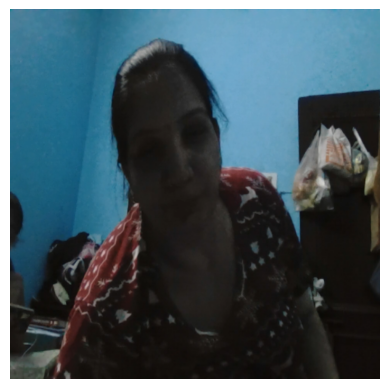

In [9]:
image = cv2.imread("./SELFIE.png")
(region, age,gender,race,gender_probs,race_probs ) =  get_items(image)
rects  =  detector.detectMultiScale(image,1.1,5,2)
for (x,y,w,h) in rects :
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
    cv2.putText(image,f"{age},{race},{gender}",(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,255),3)
    

print(f"{age},{race},{gender}")
image =  np.array(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

plt.imshow(image)
plt.axis("off")